# **Imports and get the datasets**

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
%matplotlib inline


In [182]:
data1 = pd.read_csv('/content/drive/MyDrive/Datasets/credit_record.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Datasets/application_record.csv')
data_origin = pd.merge(data1,data2,on='ID')
data = data_origin.sample(n= 100000, random_state=42)
data.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
489996,5096070,-27,1,F,Y,N,0,180000.0,Working,Higher education,Married,House / apartment,-14943,-1650,1,1,0,1,Core staff,2.0
293437,5061151,-20,X,M,Y,Y,3,202500.0,Working,Secondary / secondary special,Married,House / apartment,-13300,-3668,1,0,1,0,NaN,5.0
544675,5111166,-23,X,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-13443,-2520,1,0,1,1,Managers,1.0
688170,5137185,-1,0,F,Y,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,-11405,-1934,1,1,0,0,NaN,2.0
582519,5115498,0,X,M,Y,Y,2,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16084,-1382,1,0,0,0,Laborers,4.0


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 489996 to 532146
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100000 non-null  int64  
 1   MONTHS_BALANCE       100000 non-null  int64  
 2   STATUS               100000 non-null  object 
 3   CODE_GENDER          100000 non-null  object 
 4   FLAG_OWN_CAR         100000 non-null  object 
 5   FLAG_OWN_REALTY      100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   NAME_INCOME_TYPE     100000 non-null  object 
 9   NAME_EDUCATION_TYPE  100000 non-null  object 
 10  NAME_FAMILY_STATUS   100000 non-null  object 
 11  NAME_HOUSING_TYPE    100000 non-null  object 
 12  DAYS_BIRTH           100000 non-null  int64  
 13  DAYS_EMPLOYED        100000 non-null  int64  
 14  FLAG_MOBIL           100000 non-null  int64  
 15  FLAG_WORK_PHONE  

In [184]:
data.describe()

,ID,MONTHS_BALANCE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.078811e+06,-19.323200,0.431820,1.889206e+05,-16103.361330,57817.322770,1.0,0.232830,0.299590,0.090530,2.212910
std,4.170369e+04,14.045219,0.747835,1.024059e+05,4105.137971,136514.177735,0.0,0.422637,0.458081,0.286941,0.909707
min,5.008804e+06,-60.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.044855e+06,-29.000000,0.000000,1.224000e+05,-19439.000000,-3296.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.074747e+06,-17.000000,0.000000,1.620000e+05,-15724.000000,-1688.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115519e+06,-8.000000,1.000000,2.250000e+05,-12691.000000,-430.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150487e+06,0.000000,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [185]:
data.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0


# **Data cleaning**


In [186]:
data['OCCUPATION_TYPE'].unique()

array(['Core staff', nan, 'Managers', 'Laborers', 'High skill tech staff',
       'Accountants', 'Drivers', 'Sales staff', 'Security staff',
       'Medicine staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Secretaries', 'Low-skill Laborers',
       'Realty agents', 'IT staff', 'Waiters/barmen staff', 'HR staff'],
      dtype=object)

In [187]:
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna('Unknown')
data.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
489996,5096070,-27,1,F,Y,N,0,180000.0,Working,Higher education,Married,House / apartment,-14943,-1650,1,1,0,1,Core staff,2.0
293437,5061151,-20,X,M,Y,Y,3,202500.0,Working,Secondary / secondary special,Married,House / apartment,-13300,-3668,1,0,1,0,Unknown,5.0
544675,5111166,-23,X,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-13443,-2520,1,0,1,1,Managers,1.0
688170,5137185,-1,0,F,Y,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,-11405,-1934,1,1,0,0,Unknown,2.0
582519,5115498,0,X,M,Y,Y,2,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16084,-1382,1,0,0,0,Laborers,4.0


In [188]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH'].abs()
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs()
data.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
489996,5096070,-27,1,F,Y,N,0,180000.0,Working,Higher education,Married,House / apartment,14943,1650,1,1,0,1,Core staff,2.0
293437,5061151,-20,X,M,Y,Y,3,202500.0,Working,Secondary / secondary special,Married,House / apartment,13300,3668,1,0,1,0,Unknown,5.0
544675,5111166,-23,X,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Single / not married,House / apartment,13443,2520,1,0,1,1,Managers,1.0
688170,5137185,-1,0,F,Y,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,11405,1934,1,1,0,0,Unknown,2.0
582519,5115498,0,X,M,Y,Y,2,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,16084,1382,1,0,0,0,Laborers,4.0


In [189]:
data['STATUS'].unique()

array(['1', 'X', '0', 'C', '3', '5', '2', '4'], dtype=object)

In [190]:
data.loc[ (data['STATUS'] == 'X') | (data['STATUS'] == 'C') , 'STATUS' ] = 0 # not in-debt
data.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
489996,5096070,-27,1,F,Y,N,0,180000.0,Working,Higher education,Married,House / apartment,14943,1650,1,1,0,1,Core staff,2.0
293437,5061151,-20,0,M,Y,Y,3,202500.0,Working,Secondary / secondary special,Married,House / apartment,13300,3668,1,0,1,0,Unknown,5.0
544675,5111166,-23,0,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Single / not married,House / apartment,13443,2520,1,0,1,1,Managers,1.0
688170,5137185,-1,0,F,Y,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,11405,1934,1,1,0,0,Unknown,2.0
582519,5115498,0,0,M,Y,Y,2,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,16084,1382,1,0,0,0,Laborers,4.0


In [191]:
data['STATUS'] = pd.to_numeric(data['STATUS'])

data.loc[ (data['STATUS'] <= 5 ) & (data['STATUS'] > 0 ) , 'STATUS' ] = 1  # in-debt

data['STATUS'].unique()

array([1, 0])

In [192]:
data = data.drop('ID', axis=1)
data = data.drop('MONTHS_BALANCE', axis=1)
data.head()

,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
489996,1,F,Y,N,0,180000.0,Working,Higher education,Married,House / apartment,14943,1650,1,1,0,1,Core staff,2.0
293437,0,M,Y,Y,3,202500.0,Working,Secondary / secondary special,Married,House / apartment,13300,3668,1,0,1,0,Unknown,5.0
544675,0,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Single / not married,House / apartment,13443,2520,1,0,1,1,Managers,1.0
688170,0,F,Y,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,11405,1934,1,1,0,0,Unknown,2.0
582519,0,M,Y,Y,2,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,16084,1382,1,0,0,0,Laborers,4.0


# **Label encoding**

In [193]:
le = LabelEncoder()
data['CODE_GENDER'] = le.fit_transform(data['CODE_GENDER'])
data['FLAG_OWN_CAR'] = le.fit_transform(data['FLAG_OWN_CAR'])
data['FLAG_OWN_REALTY'] = le.fit_transform(data['FLAG_OWN_REALTY'])
data['NAME_INCOME_TYPE'] = le.fit_transform(data['NAME_INCOME_TYPE'])
data['NAME_EDUCATION_TYPE'] = le.fit_transform(data['NAME_EDUCATION_TYPE'])
data['NAME_FAMILY_STATUS'] = le.fit_transform(data['NAME_FAMILY_STATUS'])
data['NAME_HOUSING_TYPE'] = le.fit_transform(data['NAME_HOUSING_TYPE'])
data['OCCUPATION_TYPE'] = le.fit_transform(data['OCCUPATION_TYPE'])
data.head()

,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
489996,1,0,1,0,0,180000.0,4,1,1,1,14943,1650,1,1,0,1,3,2.0
293437,0,1,1,1,3,202500.0,4,4,1,1,13300,3668,1,0,1,0,17,5.0
544675,0,1,1,1,0,202500.0,4,4,3,1,13443,2520,1,0,1,1,10,1.0
688170,0,0,1,0,0,67500.0,4,4,1,1,11405,1934,1,1,0,0,17,2.0
582519,0,1,1,1,2,225000.0,0,4,1,1,16084,1382,1,0,0,0,8,4.0


# **Some visualizations**

**Heatmap used to identify which feature best affects the Target ( STATUS )**

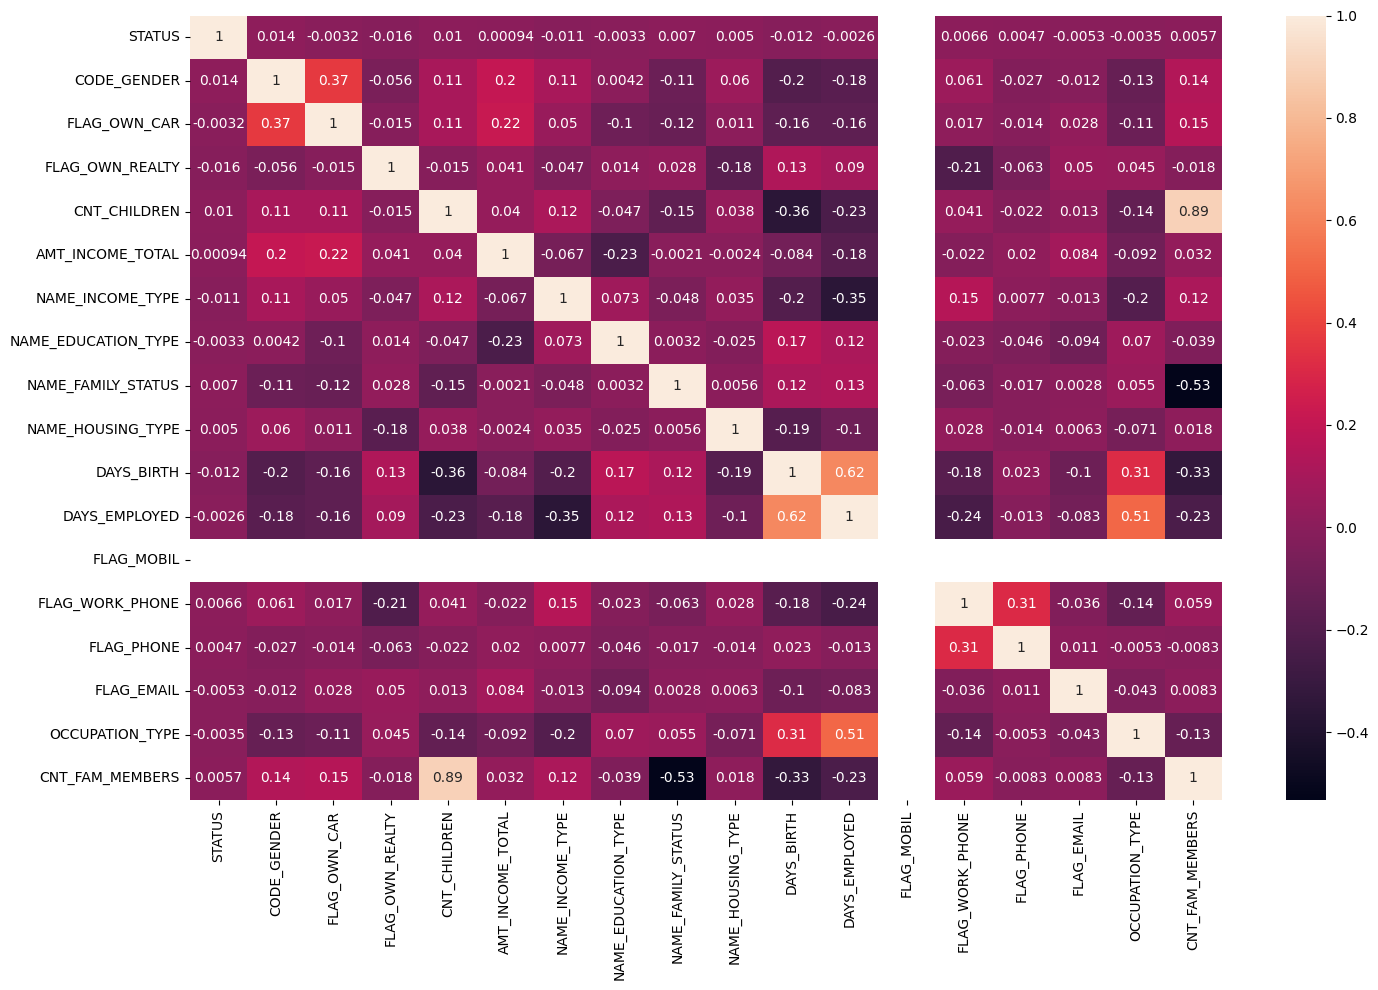

In [194]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.tight_layout()

**Boxplot used to identify the outliers in the data**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'STATUS'),
  Text(1, 0, 'CODE_GENDER'),
  Text(2, 0, 'FLAG_OWN_CAR'),
  Text(3, 0, 'FLAG_OWN_REALTY'),
  Text(4, 0, 'CNT_CHILDREN'),
  Text(5, 0, 'AMT_INCOME_TOTAL'),
  Text(6, 0, 'NAME_INCOME_TYPE'),
  Text(7, 0, 'NAME_EDUCATION_TYPE'),
  Text(8, 0, 'NAME_FAMILY_STATUS'),
  Text(9, 0, 'NAME_HOUSING_TYPE'),
  Text(10, 0, 'DAYS_BIRTH'),
  Text(11, 0, 'DAYS_EMPLOYED'),
  Text(12, 0, 'FLAG_MOBIL'),
  Text(13, 0, 'FLAG_WORK_PHONE'),
  Text(14, 0, 'FLAG_PHONE'),
  Text(15, 0, 'FLAG_EMAIL'),
  Text(16, 0, 'OCCUPATION_TYPE'),
  Text(17, 0, 'CNT_FAM_MEMBERS')])

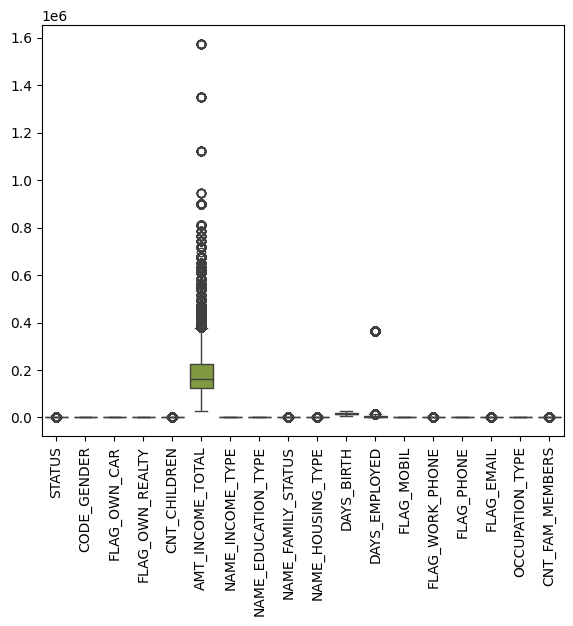

In [195]:
sns.boxplot(data=data)
plt.tight_layout()
plt.xticks(rotation=90)

Numeric features need to be scaled probably

In [196]:
scaler = StandardScaler()
data['DAYS_BIRTH'] = scaler.fit_transform(data['DAYS_BIRTH'].values.reshape(-1,1))
data['DAYS_EMPLOYED'] = scaler.fit_transform(data['DAYS_EMPLOYED'].values.reshape(-1,1))
data['AMT_INCOME_TOTAL'] = scaler.fit_transform(data['AMT_INCOME_TOTAL'].values.reshape(-1,1))
data['OCCUPATION_TYPE'] = scaler.fit_transform(data['OCCUPATION_TYPE'].values.reshape(-1,1))


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'STATUS'),
  Text(1, 0, 'CODE_GENDER'),
  Text(2, 0, 'FLAG_OWN_CAR'),
  Text(3, 0, 'FLAG_OWN_REALTY'),
  Text(4, 0, 'CNT_CHILDREN'),
  Text(5, 0, 'AMT_INCOME_TOTAL'),
  Text(6, 0, 'NAME_INCOME_TYPE'),
  Text(7, 0, 'NAME_EDUCATION_TYPE'),
  Text(8, 0, 'NAME_FAMILY_STATUS'),
  Text(9, 0, 'NAME_HOUSING_TYPE'),
  Text(10, 0, 'DAYS_BIRTH'),
  Text(11, 0, 'DAYS_EMPLOYED'),
  Text(12, 0, 'FLAG_MOBIL'),
  Text(13, 0, 'FLAG_WORK_PHONE'),
  Text(14, 0, 'FLAG_PHONE'),
  Text(15, 0, 'FLAG_EMAIL'),
  Text(16, 0, 'OCCUPATION_TYPE'),
  Text(17, 0, 'CNT_FAM_MEMBERS')])

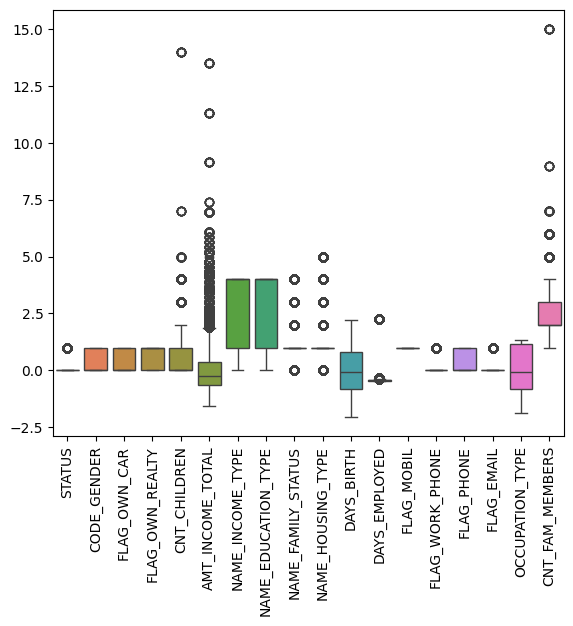

In [197]:
sns.boxplot(data=data)
plt.tight_layout()
plt.xticks(rotation=90)

Better but still AMT_INCOME_TOTAL has huge number of outliers let's transform it.
 after a bit of searching i found winsorize mean that replaced the extremes to the a limit specified here is an example
 >Imagine a group of kids with heights: 4, 4.5, 5, 5.2, 5.5, 6, 10 feet. The 10 feet kid is an outlier. Winsorizing might change it to 6 feet, the next highest, to reduce the outlier's effect on average height calculations.


In [198]:
data['AMT_INCOME_TOTAL'] = winsorize(data['AMT_INCOME_TOTAL'], limits=[0.05, 0.05])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'STATUS'),
  Text(1, 0, 'CODE_GENDER'),
  Text(2, 0, 'FLAG_OWN_CAR'),
  Text(3, 0, 'FLAG_OWN_REALTY'),
  Text(4, 0, 'CNT_CHILDREN'),
  Text(5, 0, 'AMT_INCOME_TOTAL'),
  Text(6, 0, 'NAME_INCOME_TYPE'),
  Text(7, 0, 'NAME_EDUCATION_TYPE'),
  Text(8, 0, 'NAME_FAMILY_STATUS'),
  Text(9, 0, 'NAME_HOUSING_TYPE'),
  Text(10, 0, 'DAYS_BIRTH'),
  Text(11, 0, 'DAYS_EMPLOYED'),
  Text(12, 0, 'FLAG_MOBIL'),
  Text(13, 0, 'FLAG_WORK_PHONE'),
  Text(14, 0, 'FLAG_PHONE'),
  Text(15, 0, 'FLAG_EMAIL'),
  Text(16, 0, 'OCCUPATION_TYPE'),
  Text(17, 0, 'CNT_FAM_MEMBERS')])

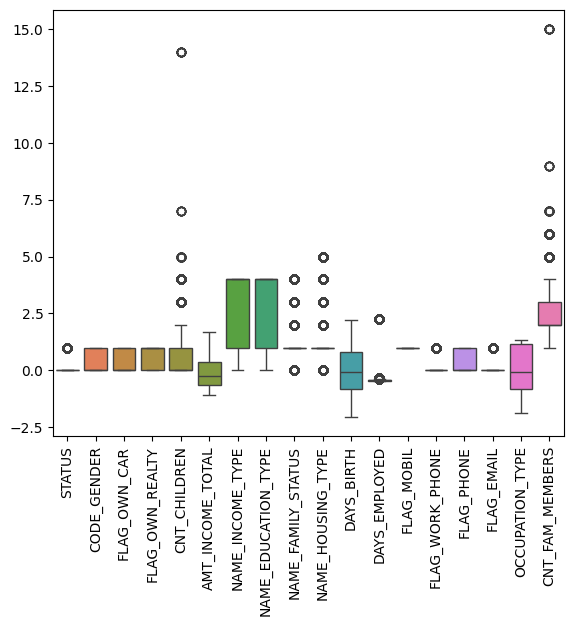

In [199]:
sns.boxplot(data=data)
plt.tight_layout()
plt.xticks(rotation=90)

# **Train Test Split and SMOTE oversampling**




In [200]:
data['STATUS'].value_counts()

,count
STATUS,
0,98541
1,1459


There's an abvious class imbalance in STATUS. let's try SMOTE to solve this

In [201]:

X = data.drop('STATUS', axis=1)
y = data['STATUS']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)



In [202]:
pca = PCA(n_components=0.90)  # Keep components that explain 90% of the variance
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [203]:
X.isnull().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
DAYS_BIRTH,0


# **Model training**

In [204]:
# grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf','linear']}

# grid_search = GridSearchCV(SVC(), grid,verbose=1)
# grid_search.fit(X_train_pca, y_train)

In [ ]:
# svm = grid_search.best_estimator_
svm = SVC(C=10, gamma=1, kernel='rbf')
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)

report = classification_report(y_test, y_pred)
print(report)

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Classification Report')
plt.show()